tensor([[-2.1945e-01],
        [ 4.5443e-02],
        [ 3.4287e-02],
        [ 1.9221e+00],
        [-1.7126e+00],
        [ 6.2277e+00],
        [-3.9573e-03],
        [-9.3135e-01],
        [ 3.4563e-01],
        [-1.2698e-02],
        [-4.3458e-01],
        [ 1.1105e-02],
        [-4.6035e-01]], dtype=torch.float64)
linear MSE is:30.553227498511756
optimal lambda:22,corresponding MSE is:28.8460776077904


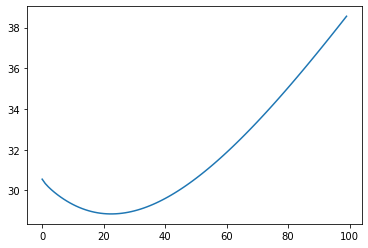

In [12]:
'''
Author: LawsonAbs
Date: 2020-10-23 22:00:47
LastEditTime: 2020-10-26 09:18:37
FilePath: /wheels/regression/regression.py
'''
import torch as t
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # 使用波士顿房价数据集
    

# 计算线性回归
'''
description: 
param {*} x:传入的数据，是个矩阵，tensor类型
return {*}
'''
def linearRegression(x,y):
    # 如果说，直接用了 nn.Linear() 这个操作，就不用手动计算下面的w值，因为它会自动计算出来    
    # linear = nn.Linear(in_features=inFea,out_features=outFea)  # 线性映射操作    
    xT = t.transpose(x,0,1) # 计算得到x的转置

    # 直接计算解析解
    tX =  t.mm(xT, x)  # 矩阵的乘法操作
    tX = t.inverse(tX) # 再算逆
    w = t.mm(tX,xT)
    w = t.mm(w,y)
    
    return w  # 得到的参数w


'''
description: 岭回归
param {*} x
param {*} inFea
param {*} outFea
return {*}
'''
def ridgeRegression(x,y,lam):
    xT = t.transpose(x,0,1) # 计算得到x的转置
    # 直接计算解析解
    tX = t.mm(xT, x)  # 求 (x的转置 * x)
    I = t.eye(tX.size(0)) 
    w = tX + lam * I # 加上单位阵
    w = t.inverse(w) # 算逆
    w = t.mm(w,xT)
    w = t.mm(w,y) 
    return w  # 得到的参数w
    

'''
description: 
计算在训练集上的错误率 
计算在测试集上的错误率
param {*} x： 训练数据
param {*} y： 训练数据
param {*} w： 参数值
return {*} errRate:错误率
return {*}
'''
def calErrorRate(x,y,w):
    w = t.transpose(w,0,1) # 先转置一下
    threshold = 2
    error = 0
    for i in range(len(x)):
        item = x[i]
        item = item.view(item.size(0),1)
        out = t.mm(w,item)
        #print(f"模拟out={out.item()}, 实际price={y[i].item()}")
        if (out - y[i]) > threshold:
            error += 1
    errRate = error / len(y)
    return errRate


'''
description: 得到两个不同模型的均方误差
param {*} x
param {*} y
param {*} w
'''
def getMSE(x,y,w):
    w = t.transpose(w,0,1) # 先转置一下        
    error = 0
    for i in range(len(x)):
        item = x[i]
        item = item.view(item.size(0),1)
        out = t.mm(w,item)
        #print(f"模拟out={out.item()}, 实际price={y[i].item()}")
        error += ( (out - y[i]) * (out - y[i]) )            
    return error / len(y)


if __name__ == "__main__":
    # 使用sklean中的数据集
    x,y = load_boston(return_X_y=True)
    
    x = t.tensor(x)
    y = t.tensor(y)
    y.unsqueeze_(1) # 将y变成一个列向量
    # 划分数据集
    part1 = int(x.size(0) * 0.8)  # 强转为int    
    x_train = x[:part1]
    y_train = y[:part1]
    x_test = x[part1:-1]
    y_test = y[part1:-1]
    
    # 得到训练模型
    lW = linearRegression(x_train,y_train) # linear w
    print(lW)
    
    # 测试数据误差率
    linearERate = calErrorRate(x_test,y_test,lW)    
    
    linearError = getMSE(x_test,y_test,lW)
    print(f"linear MSE is:{linearError.item()}")
    # 找出一个合适的λ
    lamVal=[] #lambda的值
    ridgeError=[] # 损失值
    optLam = 0 # 表示最优lam值
    minError = 0x7fffffff
    for lam in range(100):
        rW = ridgeRegression(x_train,y_train,lam)
        error = getMSE(x_test,y_test,rW)        
        if(error < minError):
            minError= error
            optLam = lam
        lamVal.append(lam)
        ridgeError.append(error)
    # 画出图形表示
    plt.plot(lamVal,ridgeError)
    print(f"optimal lambda:{optLam},corresponding MSE is:{minError.item()}")